In [1]:
import matplotlib.pyplot as plt

In [2]:
def parse_file(filename, ext='.txt'):
    def extract_line(line):
        key_map = {
            'total score': 'total_score',
            'move count': 'move_count',
            'weighted': 'weighted',
            'node count': 'node_count',
            'node_count': 'node_count',
        }
        ans = {}
        items = line.split(', ')
        for i in items:
            k, v = i.split(': ')
            ans[key_map[k.strip()]] = int(float(v.strip()))
        return ans
    ans = []
    with open(filename + ext) as f:
        for line in f.read().splitlines():
            ans.append(extract_line(line))
    return ans

In [3]:
def get_weighted(d):
    return [i['weighted'] for i in d]

def get_node_count(d):
    return [i['node_count'] for i in d]

def get_raw_move_count(d):
    return [i['node_count'] for i in d]

def get_filtered_move_count(d):
    ans = []
    for i in d:
        ans.append(i['node_count'] if i['weighted'] != -1 else -1)
    return ans

In [15]:
def get_graph(game_size, game_goal):
    data_mcts = parse_file("{}_{}_{}_result".format(game_size, game_goal, 'mcts'))
    data_baseline = parse_file("{}_{}_{}_result".format(game_size, game_goal, 'rand'))
    data_nn = parse_file("{}_{}_{}_result".format(game_size, game_goal, 'nn'))

    mcts_weighted = get_filtered_move_count(data_mcts)
    baseline_weighted = get_filtered_move_count(data_baseline)
    nn_weighted = get_filtered_move_count(data_nn)
    
    mcts_node = get_node_count(data_mcts)
    baseline_node = get_node_count(data_baseline)
    nn_node = get_node_count(data_nn)

    fig, (row1, row2) = plt.subplots(2, 3, figsize=(20, 20))
    ax1, ax2, ax3 = row1
    ax1.hist(mcts_weighted, 50, facecolor='blue', alpha=0.5, range=(-1, max(mcts_weighted+[100])), rwidth=0.9)
    ax1.set_title("MCTS Histogram")
    ax1.set_xlabel('Move Count')
    ax1.set_ylabel('Frequency(times)')
    
    ax2.hist(baseline_weighted, 50, facecolor='blue', alpha=0.5, range=(-1, max(baseline_weighted+[100])), rwidth=0.9)
    ax2.set_title("Baseline Histogram")
    ax2.set_xlabel('Move Count')
    ax2.set_ylabel('Frequency(times)')
    
    ax3.hist(baseline_weighted, 50, facecolor='blue', alpha=0.5, range=(-1, max(baseline_weighted+[100])), rwidth=0.9)
    ax3.set_title("NN Histogram")
    ax3.set_xlabel('Move Count')
    ax3.set_ylabel('Frequency(times)')
    
    ax4, ax5, ax6 = row2
    ax4.plot(mcts_node)
    ax4.set_title("MCTS Node Counts")
    ax4.set_ylim([0, max(mcts_node)])
    ax4.set_xlabel('Experiments')
    ax4.set_ylabel('Node Counts')
    
    ax5.plot(baseline_node)
    ax5.set_title("Baseline Node Counts")
    ax5.set_ylim([0, max(mcts_node)])
    ax5.set_xlabel('Experiments')
    ax5.set_ylabel('Node Counts')
    
    ax6.plot(baseline_node)
    ax6.set_title("NN Node Counts")
    ax6.set_ylim([0, max(mcts_node)])
    ax6.set_xlabel('Experiments')
    ax6.set_ylabel('Node Counts')

    fig.suptitle('Result with size {}, goal {}'.format(game_size, game_goal))
    plt.show()

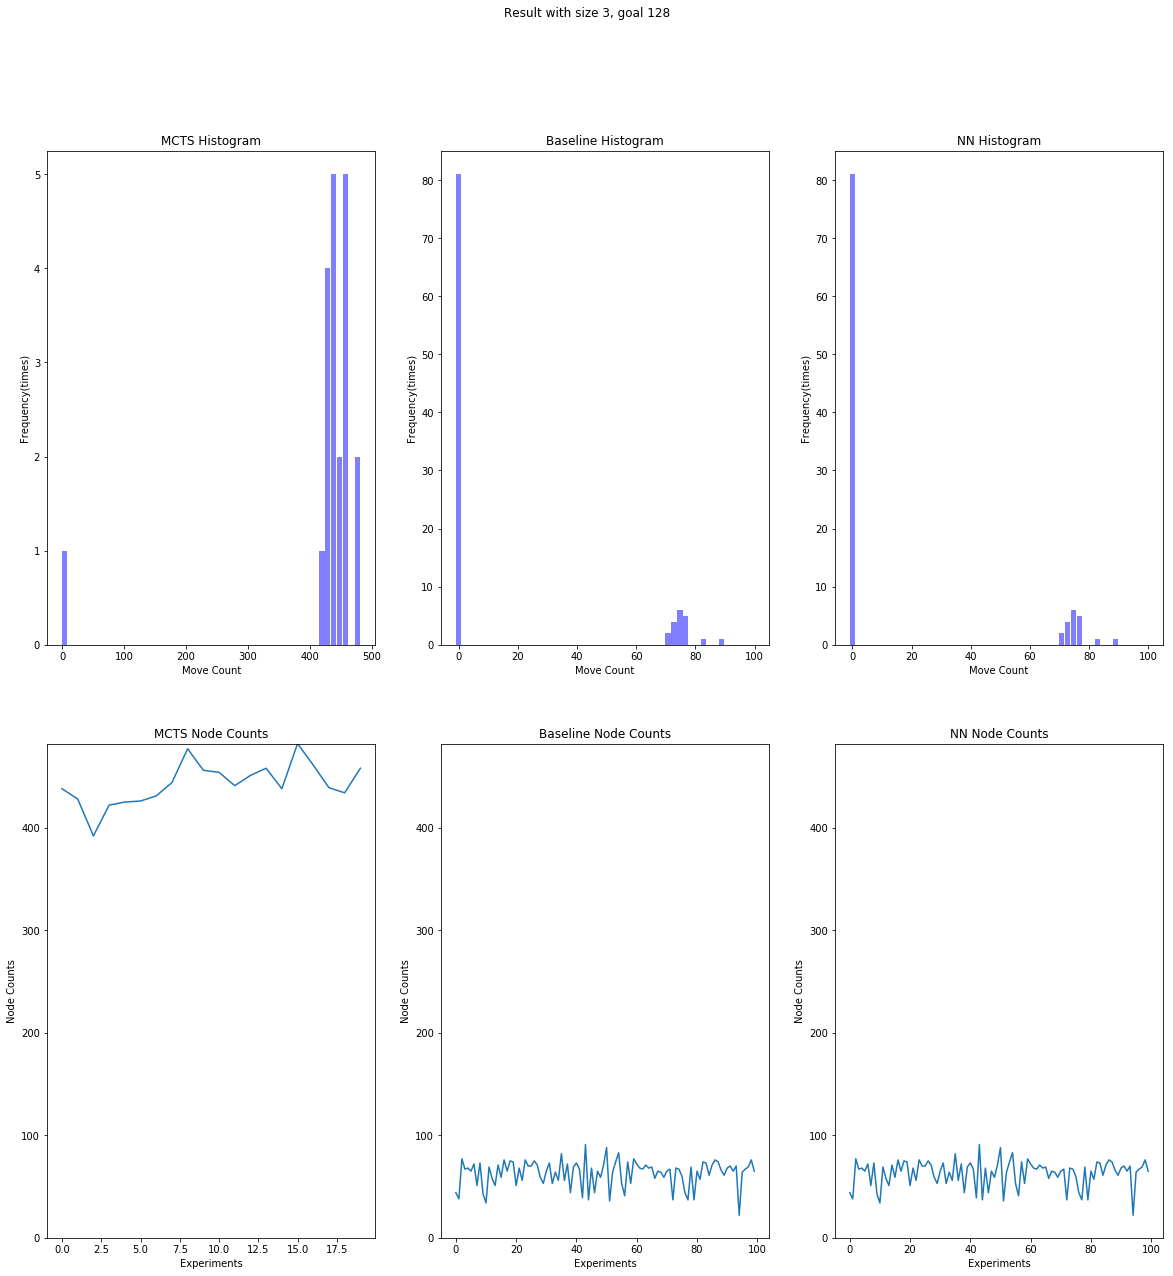

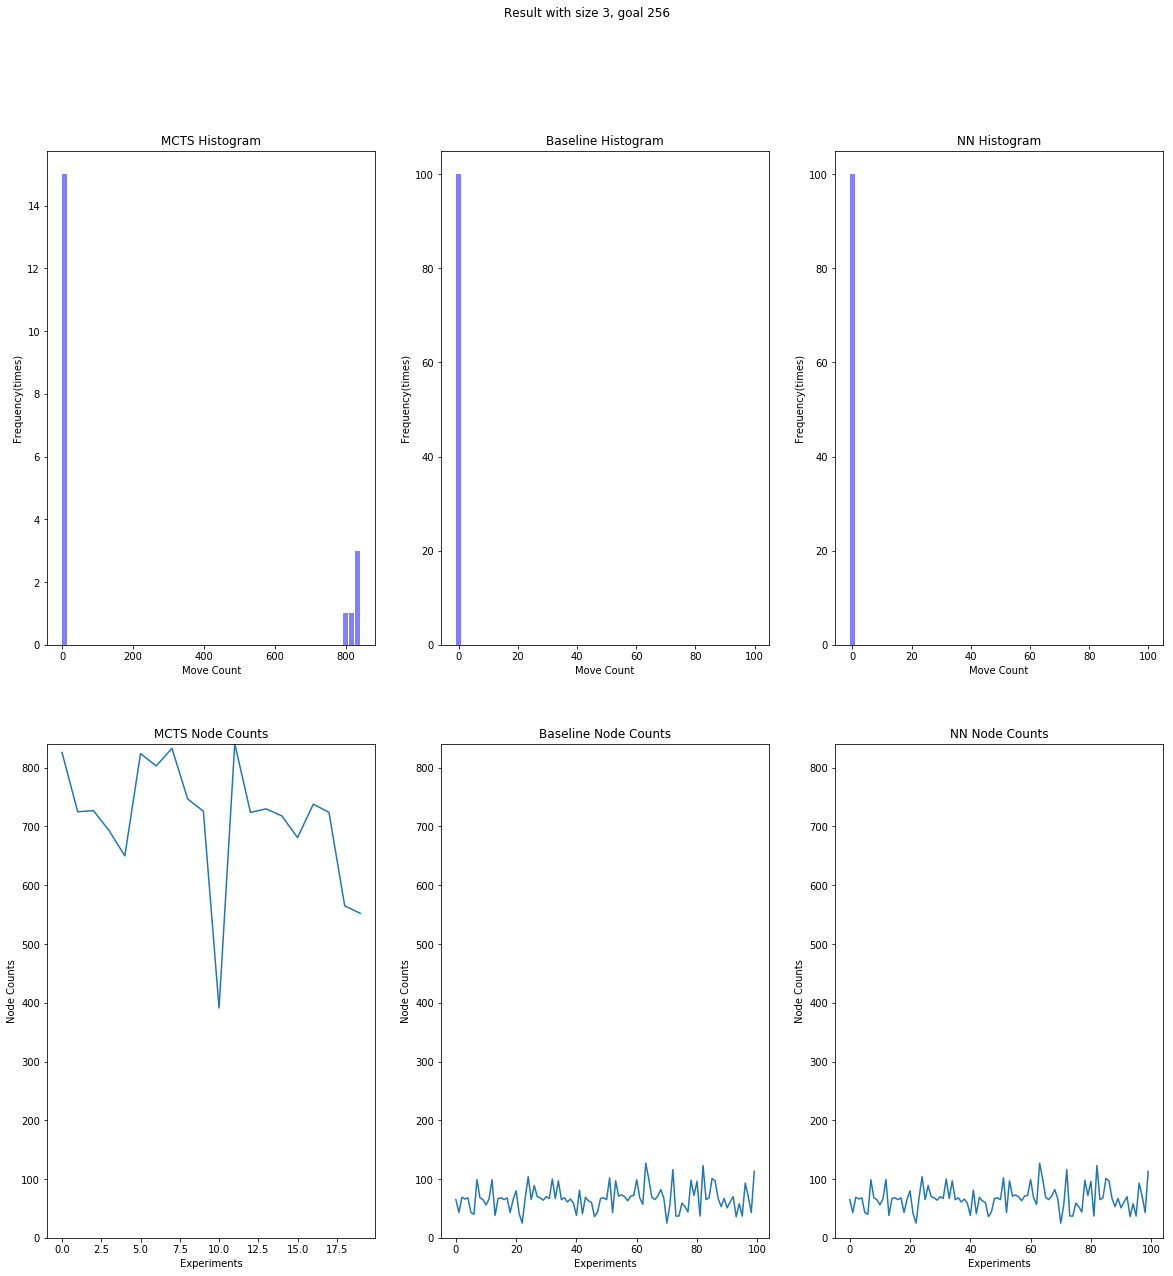

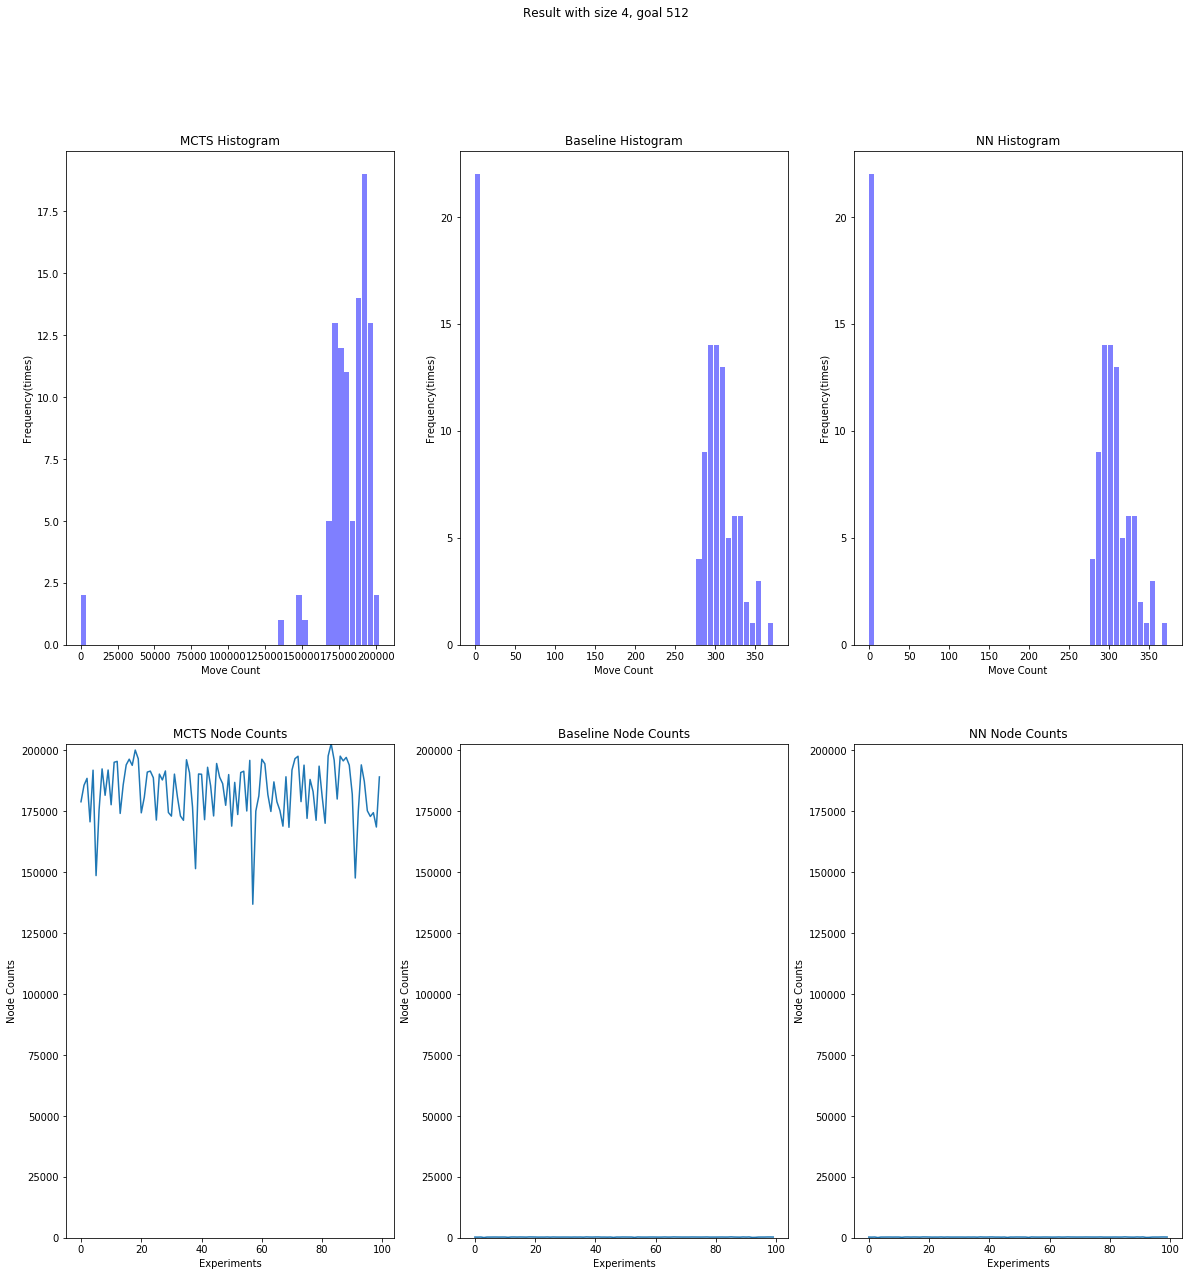

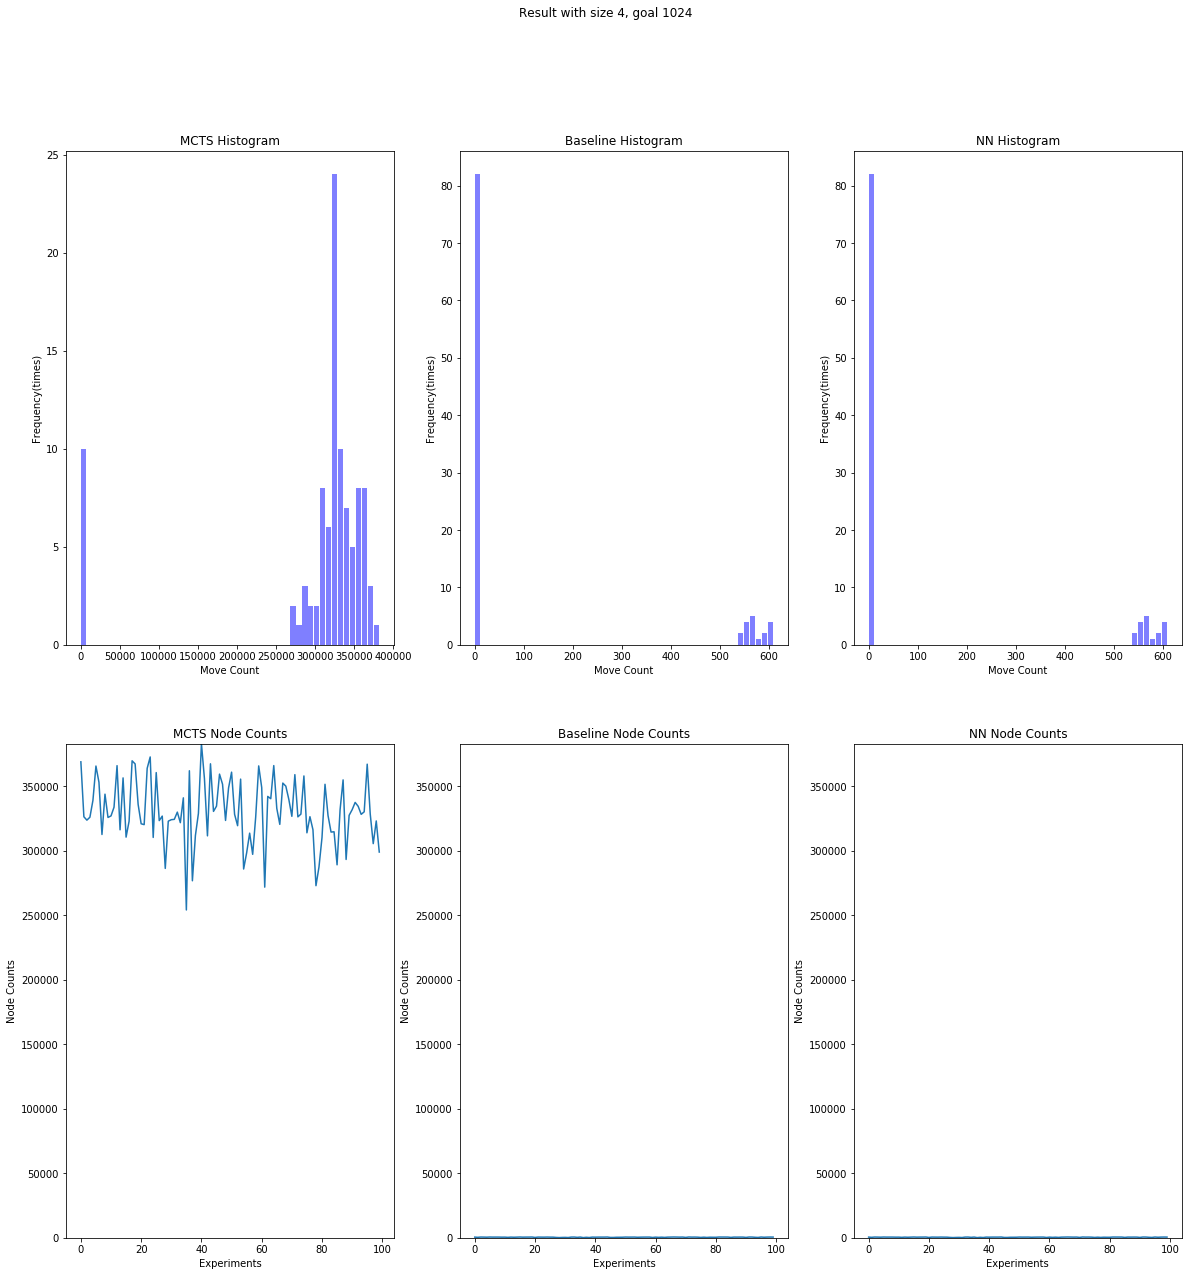

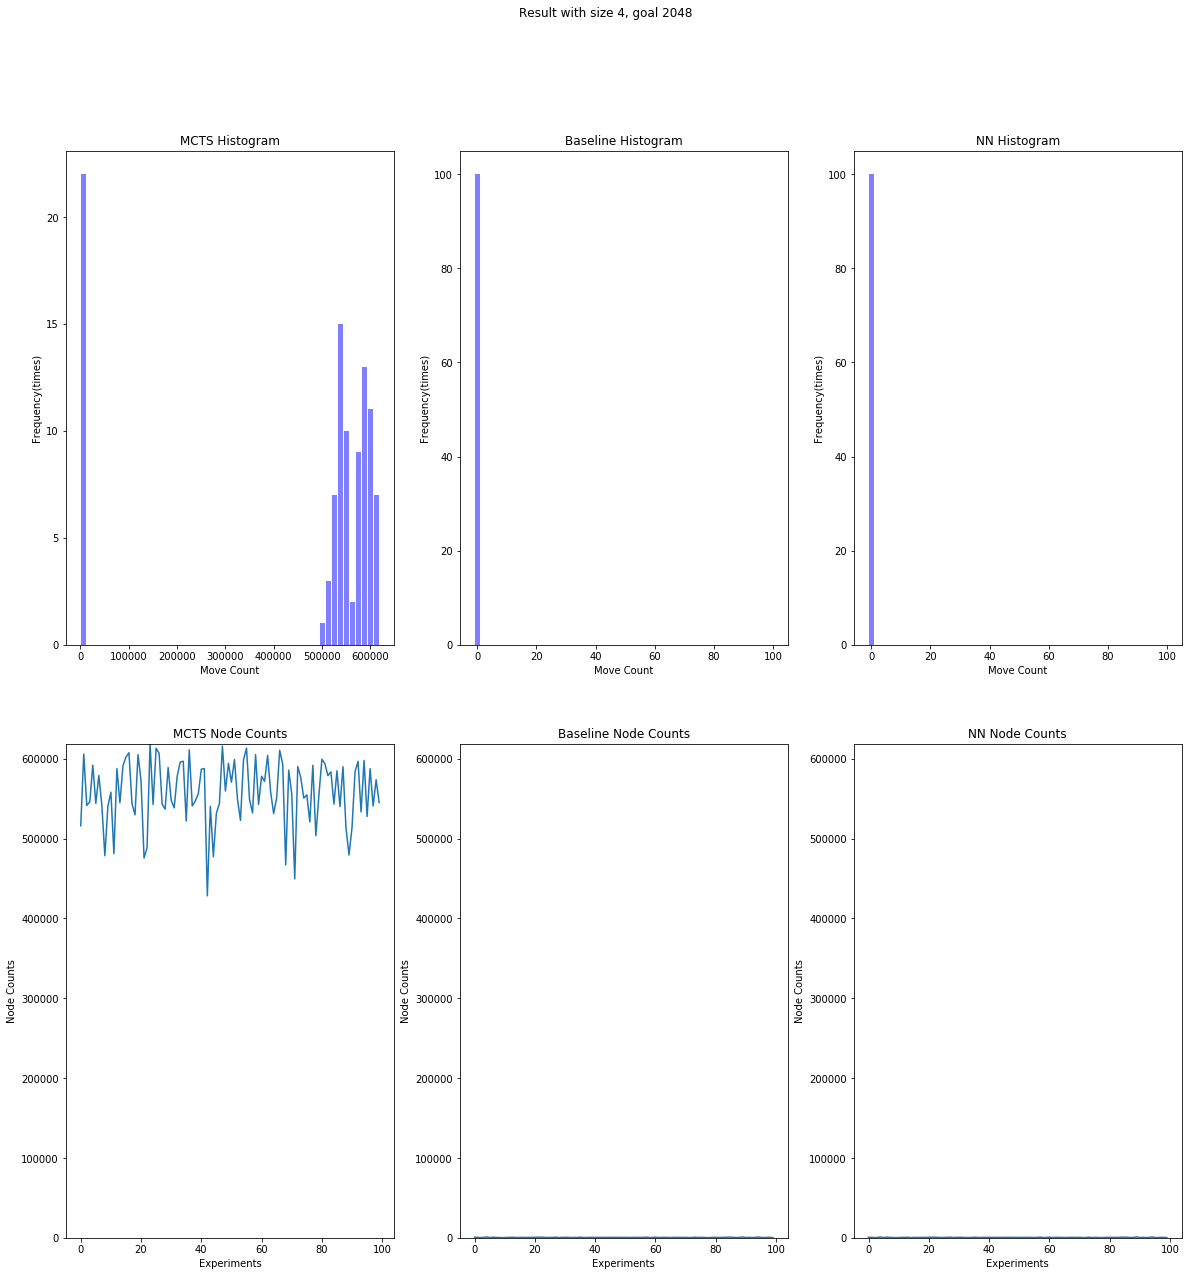

In [16]:
for size, goal in [(3,128),(3,256),(4,512),(4,1024),(4,2048)]:
    get_graph(size, goal)

In [9]:
def get_succ_rate(size, goal, game_type):
    data = parse_file("{}_{}_{}_result".format(size, goal, game_type))
    weighted = get_weighted(data)
    rate = sum(1 for i in weighted if i > -1)
    return rate

In [10]:
def get_rate_graph():
    mcts_rate = []
    baseline_rate = []
    x = []

    for size, goal in [(3,128),(3,256),(4,512),(4,1024),(4,2048)]:
        mcts_rate.append(get_succ_rate(size, goal, 'mcts'))
        baseline_rate.append(get_succ_rate(size, goal, 'rand'))
        x.append('{size}x{size} Board, Goal {goal}'.format(size=size, goal=goal))

    plt.figure(figsize=(20,10))
    plt.plot(x, mcts_rate, label = "MCTS")
    plt.plot(x, baseline_rate, label = "Baseline")
    plt.suptitle('Game instance and successful rate')
    plt.ylabel('Success Rate(%)')
    plt.legend()
    plt.show()

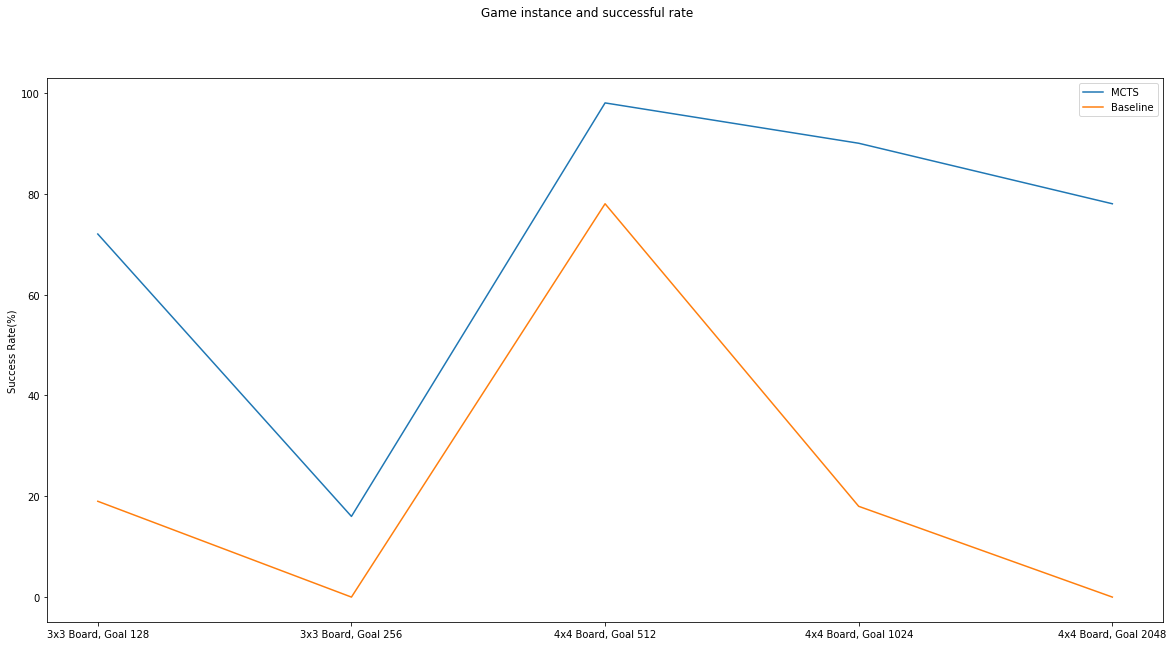

In [8]:
get_rate_graph()